## 2.1.1 Importancia de la Exploración de Datos


Paso 1: Importar librerías y cargar el conjunto de datos


In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()

# Convertirlo en un DataFrame para facilitar el análisis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


Paso 2: Análisis Exploratorio de Datos (EDA)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes:

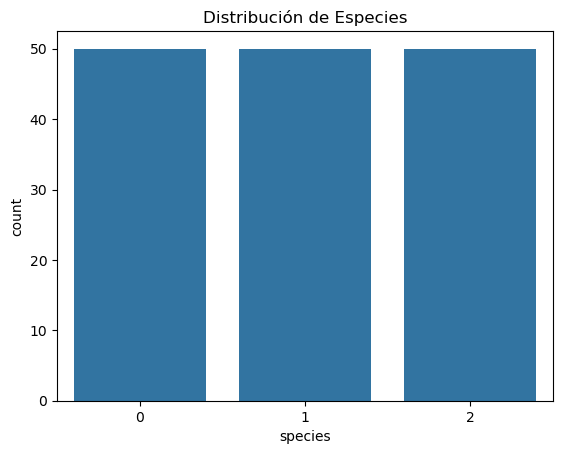

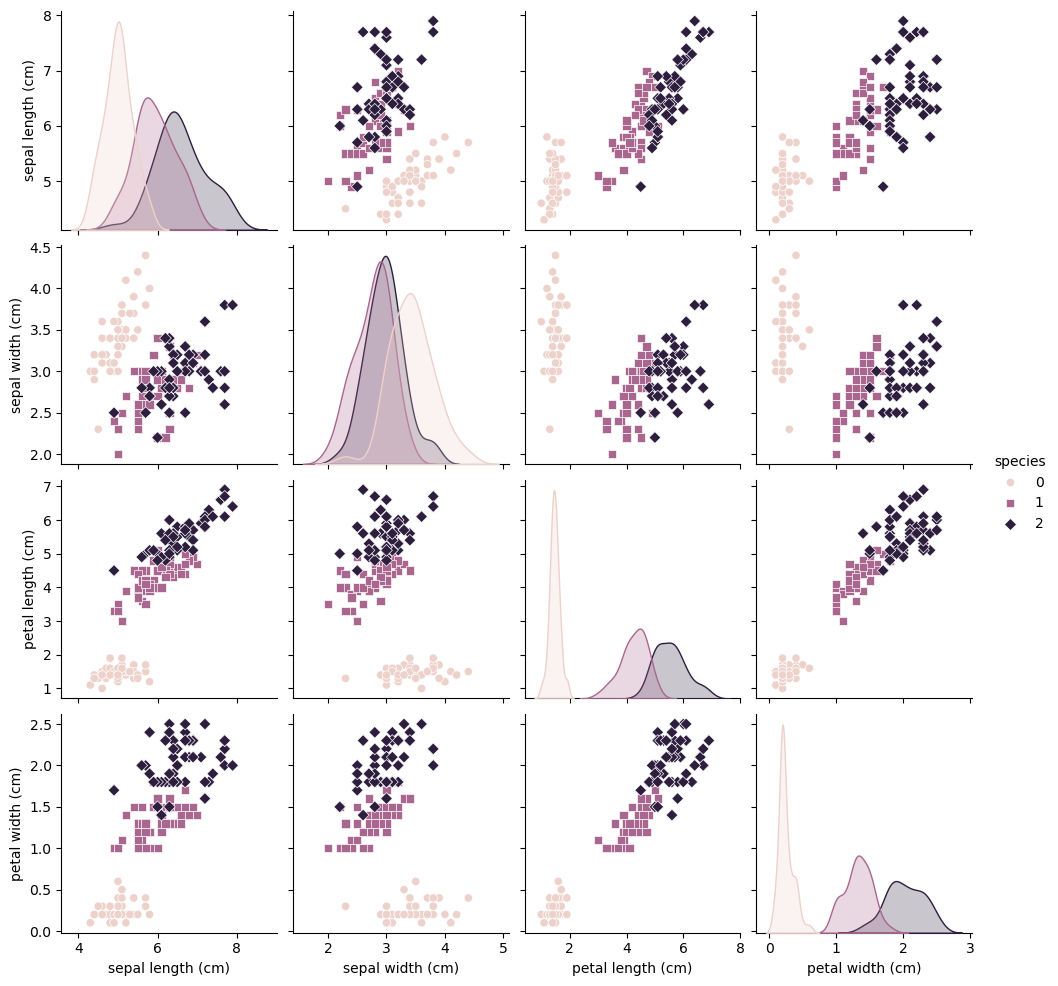

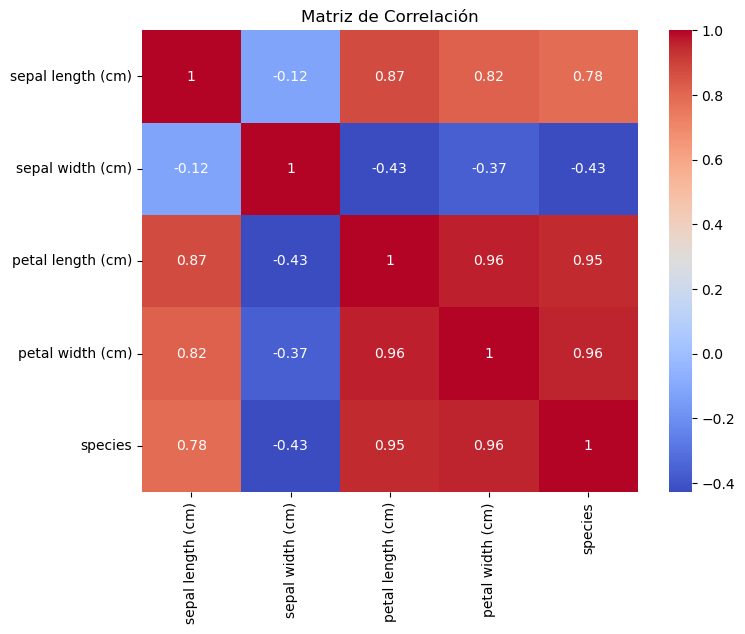

In [2]:
# Ver las primeras filas del conjunto de datos
print(df.head())

# Información básica y resumen estadístico
print(df.info())
print(df.describe())

# Visualización de la distribución de especies
sns.countplot(x='species', data=df)
plt.title('Distribución de Especies')
plt.show()

# Visualización de relaciones entre variables
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Paso 3: Preprocesamiento de Datos


In [3]:
# Separar las características (X) y las etiquetas (y)
X = df.drop('species', axis=1)
y = df['species']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Paso 4: Dividir los Datos en Conjuntos de Entrenamiento y Prueba


In [4]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Paso 5: Entrenar el Modelo de Machine Learning


In [5]:
# Definir el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Paso 6: Realizar Predicciones


In [6]:
# Hacer predicciones
y_pred = modelo.predict(X_test)


Paso 7: Evaluar el Modelo



Precisión del modelo: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



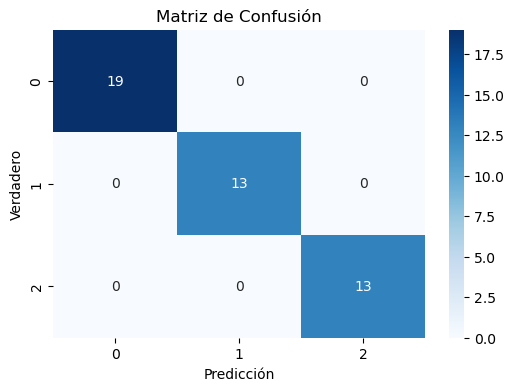

In [7]:
# Calcular precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:.2f}')

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


### Resumen de los Pasos
1. Carga y visualización de datos: Exploramos los datos con gráficos para comprender su estructura y distribución.
2. Preprocesamiento: Estandarizamos las características para mejorar el rendimiento.
3. División de datos: Dividimos el conjunto de datos en entrenamiento y prueba para evaluar el modelo.
4. Entrenamiento: Entrenamos un modelo RandomForestClassifier usando el conjunto de entrenamiento.
5. Predicción: Realizamos predicciones sobre el conjunto de prueba.
6. Evaluación: Evaluamos el modelo mediante la precisión, el reporte de clasificación y la matriz de confusión para analizar el rendimiento.

## Correlación

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Fijar una semilla para la reproducibilidad
np.random.seed(42)

# Crear una variable base x
x = np.linspace(0, 10, 100)

# Crear una variable y_positiva que tiene una correlación positiva con x
y_positiva = 2 * x + np.random.normal(0, 1, 100)  # Añadimos algo de ruido

# Crear una variable y_negativa que tiene una correlación negativa con x
y_negativa = -1.5 * x + np.random.normal(0, 1, 100)  # Añadimos algo de ruido

# Crear el DataFrame
df = pd.DataFrame({'x': x, 'y_positiva': y_positiva, 'y_negativa': y_negativa})


In [ ]:
# Visualización de la correlación positiva
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['x'], df['y_positiva'], color='b')
plt.title('Correlación Positiva entre x e y_positiva')
plt.xlabel('x')
plt.ylabel('y_positiva')

# Visualización de la correlación negativa
plt.subplot(1, 2, 2)
plt.scatter(df['x'], df['y_negativa'], color='r')
plt.title('Correlación Negativa entre x e y_negativa')
plt.xlabel('x')
plt.ylabel('y_negativa')

plt.tight_layout()
plt.show()


In [ ]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df.corr()
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# 2.1.2 Técnicas para la Limpieza de Datos


### ● Identificar y Eliminar Duplicados:


In [8]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'nombre': ['Ana', 'Juan', 'Ana', 'Carlos', 'Juan', 'Ana'],
    'edad': [23, 30, 23, 45, 30, 23],
    'ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia', 'Barcelona', 'Madrid']
}

df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)
# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()

# Mostrar el DataFrame sin duplicados
print("\nDataFrame sin duplicados:")
print(df_sin_duplicados)
# Eliminar duplicados basados en la columna 'nombre'
df_sin_duplicados_nombre = df.drop_duplicates(subset='nombre')

# Mostrar el DataFrame sin duplicados en la columna 'nombre'
print("\nDataFrame sin duplicados en la columna 'nombre':")
print(df_sin_duplicados_nombre)
# Eliminar duplicados, manteniendo la última aparición
df_sin_duplicados_ultima = df.drop_duplicates(keep='last')

# Mostrar el DataFrame con la última aparición de duplicados
print("\nDataFrame con la última aparición de duplicados:")
print(df_sin_duplicados_ultima)






DataFrame original:
   nombre  edad     ciudad
0     Ana    23     Madrid
1    Juan    30  Barcelona
2     Ana    23     Madrid
3  Carlos    45   Valencia
4    Juan    30  Barcelona
5     Ana    23     Madrid

DataFrame sin duplicados:
   nombre  edad     ciudad
0     Ana    23     Madrid
1    Juan    30  Barcelona
3  Carlos    45   Valencia

DataFrame sin duplicados en la columna 'nombre':
   nombre  edad     ciudad
0     Ana    23     Madrid
1    Juan    30  Barcelona
3  Carlos    45   Valencia

DataFrame con la última aparición de duplicados:
   nombre  edad     ciudad
3  Carlos    45   Valencia
4    Juan    30  Barcelona
5     Ana    23     Madrid


### ● Manejo de Valores Nulos:


In [9]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con valores faltantes
data = {
    'nombre': ['Ana', 'Juan', 'Carlos', 'Luis', 'María'],
    'edad': [23, np.nan, 35, np.nan, 45]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original con valores faltantes:")
print(df)
# Llenar valores faltantes en la columna 'edad' con la media de la columna
df['edad'].fillna(df['edad'].mean(), inplace=True)

# Mostrar el DataFrame después de llenar los valores faltantes
print("\nDataFrame después de llenar valores faltantes con la media:")
print(df)


DataFrame original con valores faltantes:
   nombre  edad
0     Ana  23.0
1    Juan   NaN
2  Carlos  35.0
3    Luis   NaN
4   María  45.0

DataFrame después de llenar valores faltantes con la media:
   nombre       edad
0     Ana  23.000000
1    Juan  34.333333
2  Carlos  35.000000
3    Luis  34.333333
4   María  45.000000


C:\Users\fundacion\AppData\Local\Temp\ipykernel_7996\2836629365.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edad'].fillna(df['edad'].mean(), inplace=True)


### ● Tratamiento de Outliers (Valores Atípicos):


In [10]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'producto': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'ventas': [150, 200, 300, 400, 500, 1000, 600, 250, 4500, 800]
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)
# Calcular Q1 y Q3
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir outliers
outliers = df[(df['ventas'] < Q1 - 1.5 * IQR) | (df['ventas'] > Q3 + 1.5 * IQR)]

# Mostrar los outliers
print("\nOutliers detectados:")
print(outliers)


DataFrame original:
  producto  ventas
0        A     150
1        B     200
2        C     300
3        D     400
4        E     500
5        F    1000
6        G     600
7        H     250
8        I    4500
9        J     800

Outliers detectados:
  producto  ventas
8        I    4500


# 2.1.3 Visualización

### ● Distribución de Variables:


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'ventas': [150, 200, 300, 400, 500, 1000, 600, 250, 4500, 800]
}
df = pd.DataFrame(data)


### ● Relación entre Variables:


In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
data = {
    'ventas': [150, 200, 300, 400, 500, 1000, 600, 250, 4500, 800],
    'costos': [100, 150, 220, 330, 450, 900, 500, 200, 4000, 750],
    'beneficio': [50, 70, 80, 100, 150, 100, 100, 50, 500, 200]
}
df = pd.DataFrame(data)
# Calcular la matriz de correlación
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor de Correlación")
plt.show()


# 2.1.4 Ejercicio Práctico de Exploración de Datos


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Cargar el conjunto de datos
df = pd.read_csv("data.csv")
# Exploración inicial
print("Dimensiones del dataset:", df.shape)
print(df.info())
print(df.describe())
# Visualizar valores nulos
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()
# Visualizar la distribución de una variable numérica
sns.histplot(df['variable_numerica'], bins=30)
plt.title("Distribución de la variable numérica")
plt.show()
# Visualizar relación entre variables con un mapa de calor de correlación
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# 2.2.1 Escalado y Normalización


### Normalización

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'columna1': [100, 200, 300, 400, 500],
    'columna2': [10, 20, 30, 40, 50],
    'columna3': [5, 15, 25, 35, 45]
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)

from sklearn.preprocessing import MinMaxScaler

# Crear el scaler
scaler = MinMaxScaler()

# Escalar las columnas seleccionadas
df[['columna1', 'columna2']] = scaler.fit_transform(df[['columna1', 'columna2']])

# Mostrar el DataFrame escalado
print("\nDataFrame después de aplicar MinMaxScaler en columna1 y columna2:")
print(df)


### o Estandarización:


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'columna1': [10, 20, 30, 40, 50],
    'columna2': [5, 15, 25, 35, 45],
    'columna3': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)
from sklearn.preprocessing import StandardScaler

# Crear el scaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df[['columna1', 'columna2']] = scaler.fit_transform(df[['columna1', 'columna2']])

# Mostrar el DataFrame después de la estandarización
print("\nDataFrame después de aplicar StandardScaler en columna1 y columna2:")
print(df)


# 2.2.2 Codificación de Variables Categóricas


### ● Codificación One-Hot (One-Hot Encoding):


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'columna_categorica': ['A', 'B', 'A', 'C', 'B', 'C'],
    'valor': [10, 15, 10, 20, 15, 20]
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)
# Convertir la columna categórica en variables dummy
df = pd.get_dummies(df, columns=['columna_categorica'])

# Mostrar el DataFrame después de aplicar get_dummies
print("\nDataFrame después de aplicar pd.get_dummies:")
print(df)


### ● Codificación de Etiquetas (Label Encoding):


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'nombre': ['Ana', 'Juan', 'Carlos', 'Luis', 'María'],
    'nivel_experiencia': ['Bajo', 'Medio', 'Alto', 'Bajo', 'Alto']
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df)
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Transformar la columna 'nivel_experiencia'
df['nivel_experiencia'] = le.fit_transform(df['nivel_experiencia'])

# Mostrar el DataFrame después de aplicar LabelEncoder
print("\nDataFrame después de aplicar LabelEncoder en 'nivel_experiencia':")
print(df)



# 2.2.3 Manejo de Datos Desbalanceados


### ● Sobremuestreo:


#### Paso 1: Crear un DataFrame de Ejemplo con Clases Desbalanceadas


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo con clases desbalanceadas
data = {
    'caracteristica': [2, 3, 5, 4, 6, 9, 7, 10, 11, 13, 12, 14],
    'clase': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df['clase'].value_counts())


#### Paso 2: Realizar el Sobremuestreo de la Clase Minoritaria


In [11]:
from sklearn.utils import resample

# Separar las clases mayoritaria y minoritaria
clase_minoritaria = df[df['clase'] == 1]
clase_mayoritaria = df[df['clase'] == 0]

# Realizar el sobremuestreo en la clase minoritaria
clase_minoritaria_oversampled = resample(clase_minoritaria,
                                         replace=True,  # Permite repetición
                                         n_samples=len(clase_mayoritaria),  # Igualar el tamaño de la clase mayoritaria
                                         random_state=42)  # Fijar la semilla para reproducibilidad

# Combinar ambas clases para crear un DataFrame balanceado
df_oversampled = pd.concat([clase_mayoritaria, clase_minoritaria_oversampled])

# Mostrar el DataFrame después de aplicar sobremuestreo
print("\nDataFrame después de sobremuestreo:")
print(df_oversampled['clase'].value_counts())


KeyError: 'clase'

### ● Submuestreo:
